In [1]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import binom     # load binomial distribution
from scipy.optimize import fsolve
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
from IPython.display import display, Markdown

In [2]:
def BinomvisualtypeI(n1,p):

    m1 = 1000000

    v = np.arange(0, n1) # values for x-axis
    u = np.linspace(0, 1, m1) # values for x-axis

    Xpdf = binom.pmf(v, n1, p) # pdf for X
    Xcdf = binom.cdf(v, n1, p) # cdf for X
    Xccdf = 1-Xcdf               # ccdf for X

    Ypdf = binom.pmf(u*n1, n1, p) # pdf for Y
    Ycdf = binom.cdf(u*n1, n1, p) # cdf for Y
    Yccdf = 1-Ycdf               # ccdf for Y

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 3 columns

    # Plot the PDF on the first subplot
    axs[0].plot(v, Xpdf)
    axs[0].set_ylim(0, .2)
    axs[0].set_title('pdf of T_%i~Binom(%i, %1.2f)' % (n1,n1,p))

    # Plot the pdf + ccdf on the second subplot
    axs[1].plot(v, Xpdf+Xccdf)
    axs[1].set_ylim(0, 1.1)
    axs[1].set_title('probability of Type I error \n as function of c in [0,%i]' % n1)
    axs[1].set_xlabel('c')  # Add x-axis label
    axs[1].axhline(y=.05, color='r', label='.05')

    # Plot the pdf + ccdf on the second subplot
    axs[2].plot(u, Ypdf+Yccdf)
    axs[2].set_ylim(0, 1.1)
    axs[2].set_title('probability of Type I error \n as function of d=c/%i in [0,1]' %n1)
    axs[2].set_xlabel('d')  # Add x-axis label
    axs[2].axhline(y=.05, color='r', label='.05')


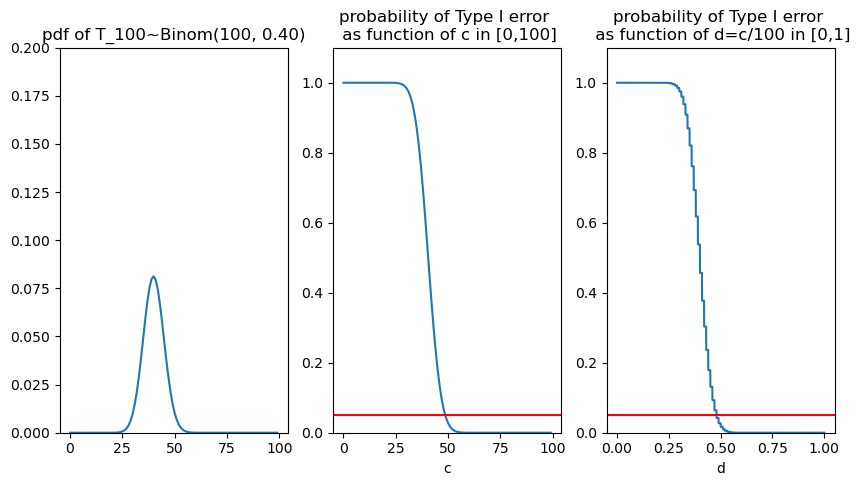

In [3]:
BinomvisualtypeI(100,.4)

In [4]:
def Binomboth(n1, p, q):

    m1 = 1000000

    v = np.arange(0, n1) # values for x-axis
    v1 = np.linspace(0, n1, n1*20) # values for x-axis
    u = np.linspace(0, 1, m1) # values for x-axis
    u1 = u*n1

    X1pdf = binom.pmf(v, n1, p) # pdf for X1
    X1cdf = binom.cdf(v, n1, p) # cdf for X1
    X1ccdf = 1-X1cdf               # ccdf for X1

    Y1pdf = binom.pmf(u*n1, n1, p) # pdf for Y1
    Y1cdf = binom.cdf(u*n1, n1, p) # cdf for Y1
    Y1ccdf = 1-Y1cdf               # ccdf for Y1


    X2pdf = binom.pmf(v, n1, q) # pdf for X2
    X2cdf = binom.cdf(v, n1, q) # cdf for X2
    X2ccdf = 1-X2cdf               # ccdf for X2

    Y2pdf = binom.pmf(u*n1, n1, q) # pdf for Y2
    Y2cdf = binom.cdf(u*n1, n1, q) # cdf for Y2
    Y2ccdf = 1-Y2cdf               # ccdf for Y2


    X1pdfrich = binom.pmf(v1, n1, p) # pdf for X1
    X1cdfrich = binom.cdf(v1, n1, p) # cdf for X1
    X1ccdfrich = 1-X1cdfrich               # ccdf for X1

    # Find the least x-value where y is under the prescribed value
    cvX= v1[(np.argwhere(X1pdfrich+X1ccdfrich < .05))[0]]
    cvY= u[(np.argwhere(Y1pdf+Y1ccdf < .05))[0]]

    return cvX[0], cvY[0], 1-binom.cdf(cvX[0], n1, p)+binom.pmf(cvX[0], n1, p), binom.cdf(cvX[0], n1, q)-binom.pmf(cvX[0], n1, q), 1-(binom.cdf(cvX[0], n1, q)-binom.pmf(cvX[0], n1, q))


In [5]:
# Define your function
def Binombothmarkdown(n1, p, q):
    # Your function implementation here
    value =  Binomboth(n1, p, q)
    a = value[0]
    b=value[1]
    c=value[2]
    d=value[3]
    e=value[4]
    return {
        'The sample size n': n1,
        'Min value of c to reject at .05': a,
        'Min value of d=c/n to reject at .05': b,
        'Probability of Type I error': c,
        'Probability of Type II error': d,
        'Power (1-Probability of Type II error)': e
    }

# Run the function several times and store the results
results = [Binombothmarkdown(x, .4, .6) for x in [10, 20,50, 100,1000,10000, 100000]]

# Convert the results to a DataFrame
df = pd.DataFrame(results)

df = df.round(3)

display(Markdown(df.to_markdown()))

|    |   The sample size n |   Min value of c to reject at .05 |   Min value of d=c/n to reject at .05 |   Probability of Type I error |   Probability of Type II error |   Power (1-Probability of Type II error) |
|---:|--------------------:|----------------------------------:|--------------------------------------:|------------------------------:|-------------------------------:|-----------------------------------------:|
|  0 |                  10 |                             7.035 |                                 0.7   |                         0.012 |                          0.833 |                                    0.167 |
|  1 |                  20 |                            12.03  |                                 0.6   |                         0.021 |                          0.584 |                                    0.416 |
|  2 |                  50 |                            26.026 |                                 0.52  |                         0.031 |                          0.156 |                                    0.844 |
|  3 |                 100 |                            48.024 |                                 0.48  |                         0.042 |                          0.01  |                                    0.99  |
|  4 |                1000 |                           426.021 |                                 0.426 |                         0.044 |                          0     |                                    1     |
|  5 |               10000 |                          4081.02  |                                 0.408 |                         0.048 |                          0     |                                    1     |
|  6 |              100000 |                         40255     |                                 0.403 |                         0.05  |                          0     |                                    1     |

In [6]:
1-binom.cdf(7.035, 10, .4)

0.01229455359999998

In [7]:
.0001+.0016+.0106+.0425+.1115+.2006+.2508+.2150

0.8327

In [8]:
def Binomvisualbothtypes(n1,p,q):

    m1 = 1000000

    v = np.arange(0, n1) # values for x-axis
    v1 = np.linspace(0, n1, n1*20) # values for x-axis
    u = np.linspace(0, 1, m1) # values for x-axis
    u1 = u*n1

    X1pdf = binom.pmf(v, n1, p) # pdf for X1
    X1cdf = binom.cdf(v, n1, p) # cdf for X1
    X1ccdf = 1-X1cdf               # ccdf for X1

    Y1pdf = binom.pmf(u*n1, n1, p) # pdf for Y1
    Y1cdf = binom.cdf(u*n1, n1, p) # cdf for Y1
    Y1ccdf = 1-Y1cdf               # ccdf for Y1


    X2pdf = binom.pmf(v, n1, q) # pdf for X2
    X2cdf = binom.cdf(v, n1, q) # cdf for X2
    X2ccdf = 1-X2cdf               # ccdf for X2

    Y2pdf = binom.pmf(u*n1, n1, q) # pdf for Y2
    Y2cdf = binom.cdf(u*n1, n1, q) # cdf for Y2
    Y2ccdf = 1-Y2cdf               # ccdf for Y2


    X1pdfrich = binom.pmf(v1, n1, p) # pdf for X1
    X1cdfrich = binom.cdf(v1, n1, p) # cdf for X1
    X1ccdfrich = 1-X1cdfrich               # ccdf for X1

    

    # Find the least x-value where y is under the prescribed value
    cvX= v1[(np.argwhere(X1pdfrich+X1ccdfrich < .05))[0]]
    cvY= u[(np.argwhere(Y1pdf+Y1ccdf < .05))[0]]

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 3 columns

    # Plot the PDF on the first subplot
    axs[0].plot(v, X1pdf, label='null %1.2f' % p)
    axs[0].plot(v, X2pdf, label='alternative %1.2f' % q)
    axs[0].set_ylim(0, .2)
    axs[0].set_title('pdf of T_%i~ \n Binom(%i, %1.2f) \n vs. Binom(%i, %1.2f)' % (n1,n1,p, n1, q))
    axs[0].legend()

    # Plot the pdf + ccdf on the second subplot
    axs[1].plot(v, X1pdf+X1ccdf, label='Type I')
    axs[1].plot(v, X2cdf, label='Type II')
    axs[1].set_ylim(0, 1.1)
    axs[1].set_title('Type I vs. II \n as function of c in [0,%i]' % n1)
    axs[1].set_xlabel('c')  # Add x-axis label
    axs[1].axhline(y=.05, color='r')
    axs[1].axvline(x=cvX, color='c', linestyle='--', label = '%1.2f' % cvX)
    axs[1].legend(loc='center right')


    # Plot the pdf + ccdf on the second subplot
    axs[2].plot(u, Y1pdf+Y1ccdf, label='Type I')
    axs[2].plot(u, Y2cdf, label='Type II')    
    axs[2].set_ylim(0, 1.1)
    axs[2].set_title('Type I vs II \n as function of d=c/%i in [0,1]' % n1)
    axs[2].set_xlabel('d')  # Add x-axis label
    axs[2].axhline(y=.05, color='r')
    axs[2].axvline(x=cvY, color='c', linestyle='--', label = '%1.2f' % cvY)
    axs[2].legend(loc='center right')

    




NameError: name 'Binombothtypes' is not defined

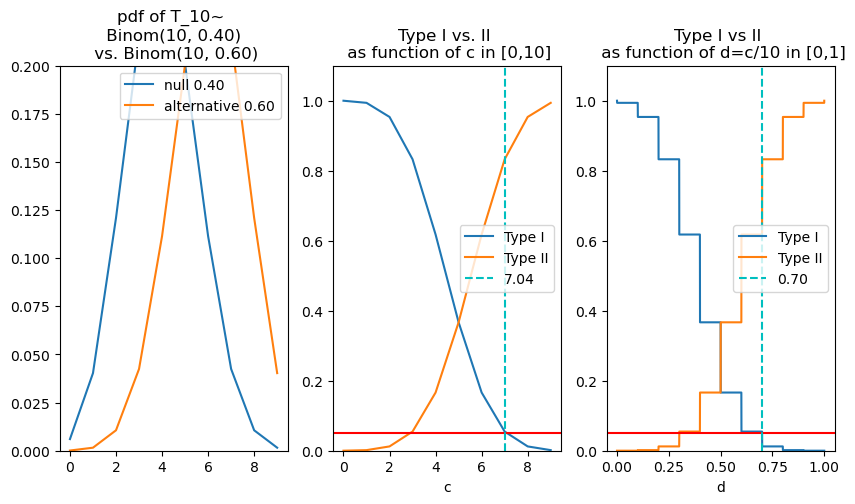

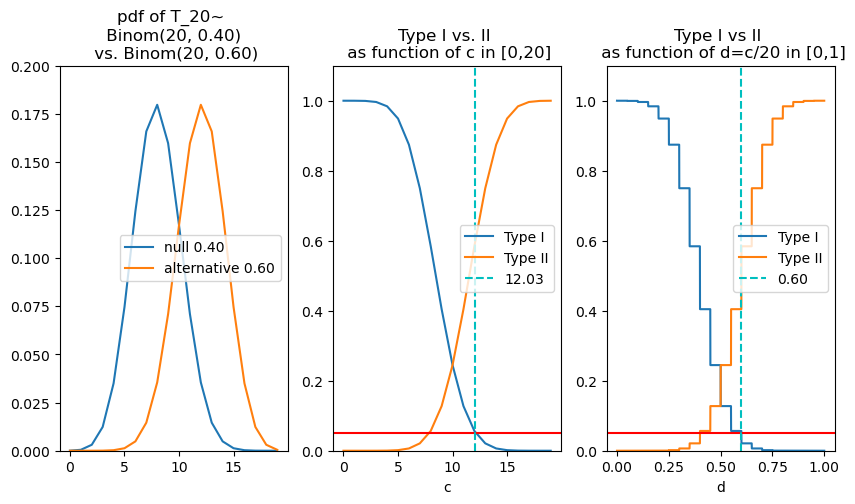

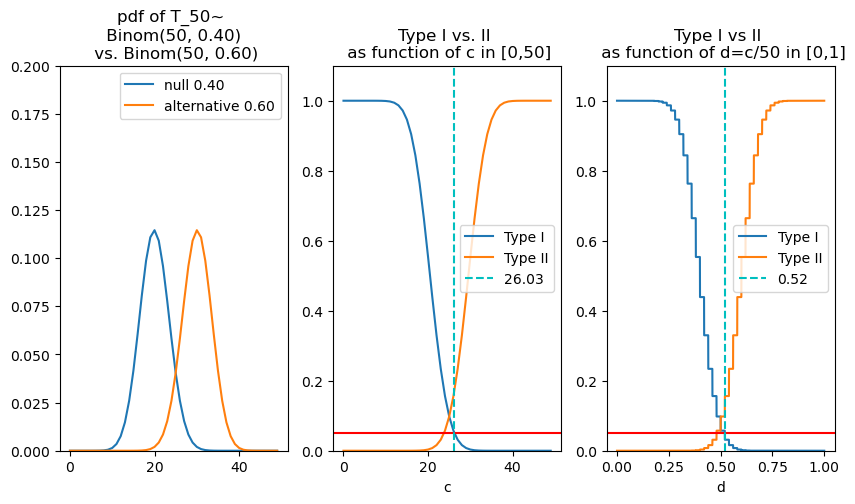

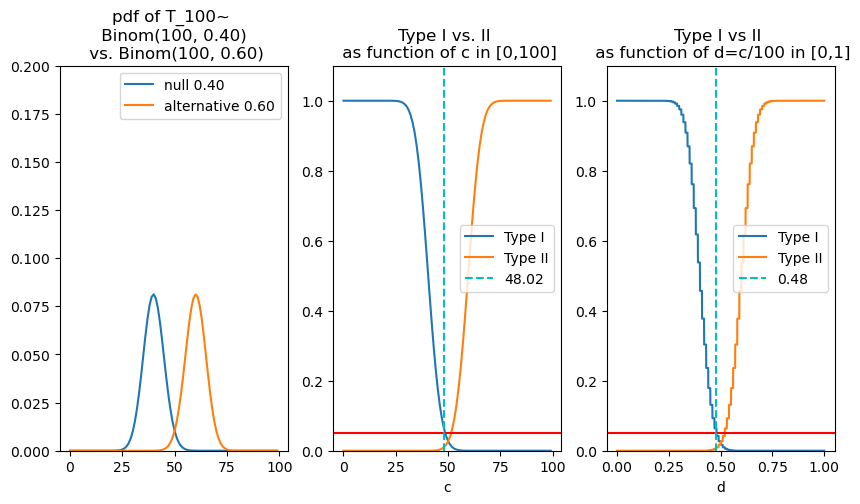

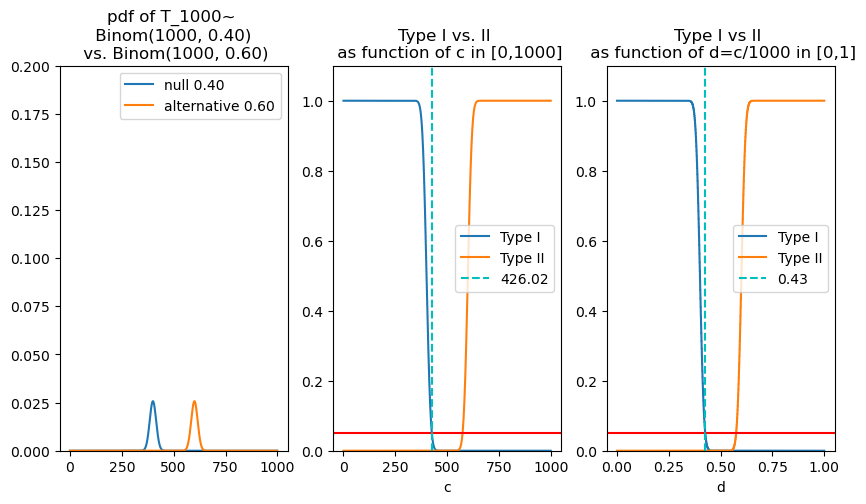

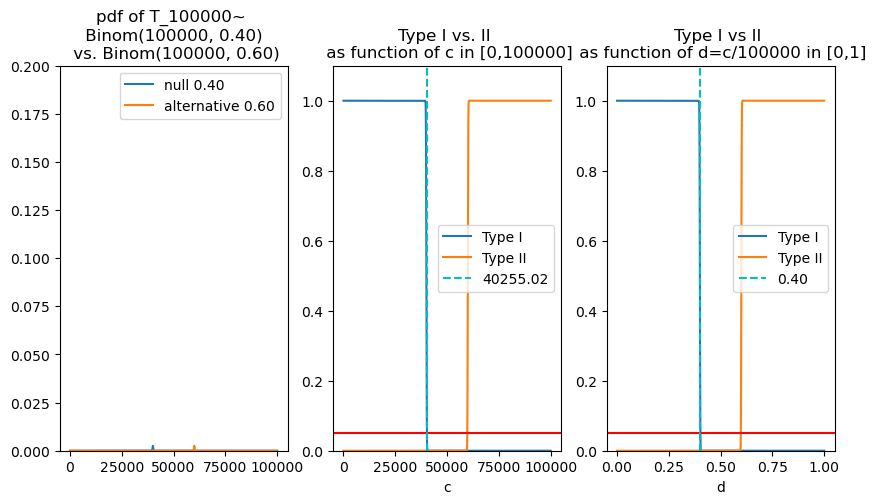

In [9]:
Binomvisualbothtypes(10,.4,.6)
Binomvisualbothtypes(20,.4,.6)
Binomvisualbothtypes(50,.4,.6)
Binomvisualbothtypes(100,.4,.6)
Binomvisualbothtypes(1000,.4,.6)
Binomvisualbothtypes(100000,.4,.6)

Binombothtypes(10,.4,.6)
Binombothtypes(20,.4,.6)
Binombothtypes(50,.4,.6)
Binombothtypes(100,.4,.6)
Binombothtypes(1000,.4,.6)
Binombothtypes(100000,.4,.6)